In [15]:
import pandas as pd

df = pd.read_csv("heights.csv")
df.tail()


,name,height
15,johnson,6.5
16,donald,6.6
17,aamir,7.1
18,ken,7.1
19,Liu,40.2


In [6]:
Q1, Q3=df["height"].quantile([0.25,0.75])
Q1, Q3

(5.3500000000000005, 6.275)

In [7]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [9]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower, upper

(3.962500000000001, 7.6625)

In [10]:
df[(df["height"]<lower) | (df["height"]>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [13]:
df_new=df[(df["height"]>lower) & (df["height"]<upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [18]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [27]:
df_apac=df[df["Region"]=="APAC"]
df_europe=df[df["Region"]=="Europe"]
df_amer=df[df["Region"]=="Americas"]

In [21]:
def get_outliers(data):
    Q1, Q3=data["Sales"].quantile([0.25,0.75])
    IQR=Q3 - Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    return lower,upper


In [30]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [22]:
lower,upper=get_outliers(df_apac)
lower,upper

(-737.125, 59747.875)

In [31]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [25]:
lower,upper=get_outliers(df_europe)
lower,upper

(7306.875, 17665.875)

In [28]:
lower,upper=get_outliers(df_amer)
lower,upper

(16832.375, 38473.375)

In [33]:
europe_lower,europe_upper=get_outliers(df_europe)
df_europe[(df_europe["Sales"]<europe_lower) | (df_europe["Sales"]>europe_upper)]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [35]:
labels=df.Region.unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [40]:
plots=[df["Sales"][df["Region"]==label].values for label in labels]
plots

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

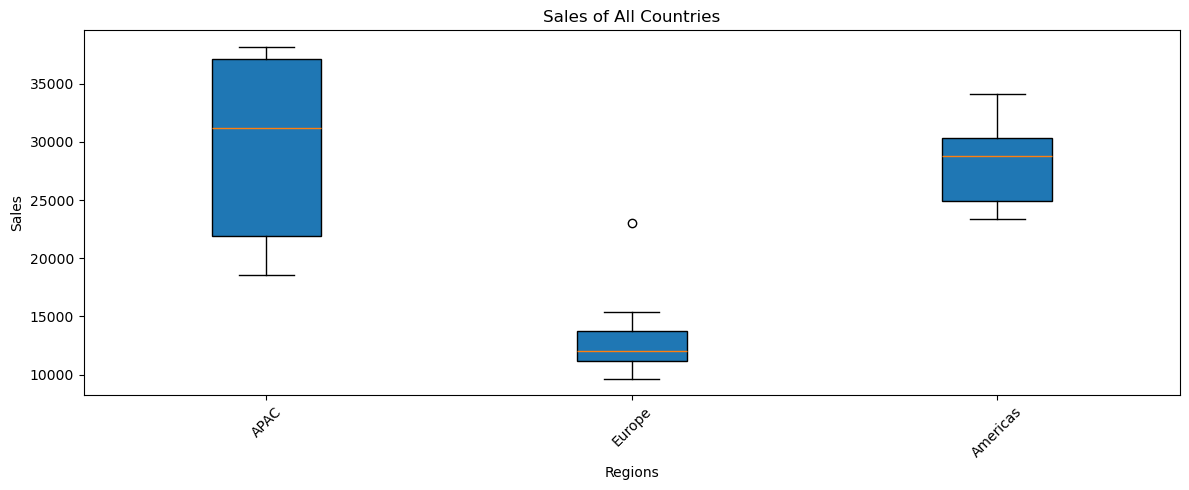

In [62]:
plt.figure(figsize=(12,5))
plt.boxplot(plots, tick_labels=labels, vert=True, patch_artist=True)
plt.title("Sales of All Countries")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
